# TEXT EMOTION DETECTION

In [2]:
from datasets import load_dataset
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Load from Hugging Face
dataset = load_dataset("dair-ai/emotion")

# Convert to pandas DataFrame
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

# Combine train and test for full dataset
df = pd.concat([df_train, df_test], ignore_index=True)

C:\Users\modim\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\modim\.cache\huggingface\hub\datasets--dair-ai--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 333423.74 examples/s]


In [4]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
df['label'].value_counts()

label
1    6057
0    5247
3    2434
4    2161
2    1463
5     638
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

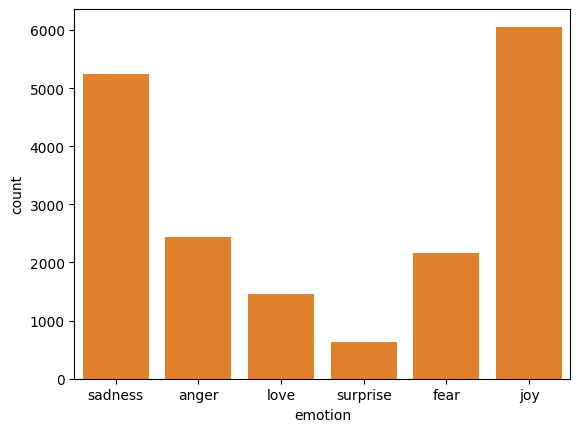

In [13]:
label_names = dataset['train'].features['label'].names
df['emotion'] = df['label'].apply(lambda x: label_names[x])

sns.countplot(x='emotion', data=df)
label_names = dataset['train'].features['label'].names
df['emotion'] = df['label'].apply(lambda x: label_names[x])

sns.countplot(x='emotion', data=df)


## Data Pre-processing

In [14]:
import neattext.functions as nfx

#Remove the user handles
df['Clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [15]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
#Remove the stopwords
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [17]:
df

,text,label,Clean_text,emotion
0,i didnt feel humiliated,0,didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,0,feeling hopeless damned hopeful cares awake,sadness
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,2,feeling nostalgic fireplace know property,love
4,i am feeling grouchy,3,feeling grouchy,anger
...,...,...,...,...
17995,i just keep feeling like someone is being unki...,3,feeling like unkind wrong think people close,anger
17996,im feeling a little cranky negative after this...,3,im feeling little cranky negative doctors appo...,anger
17997,i feel that i am useful to my people and that ...,1,feel useful people gives great feeling achieve...,joy
17998,im feeling more comfortable with derby i feel ...,1,im feeling comfortable derby feel start step s...,joy


### Splitting the data into input variables and target variable

In [18]:
x = df['Clean_text']
y = df['emotion']

### Splitting the data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.8853703703703704

In [22]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.8485185185185186

In [23]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.8698148148148148

### Saving the Model

In [24]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# Sentiment Analysis Logic

In [78]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import random


In [79]:
# Load dataset
df = pd.read_csv("Reviews.csv", usecols=["Score", "Text"])
df.dropna(subset=["Score", "Text"], inplace=True)
df['Text'] = df['Text'].astype(str).str.strip()
df = df[df['Text'] != ""]



In [80]:
# Map Score to Sentiment
def score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df['Sentiment'] = df['Score'].apply(score_to_sentiment)
print(df['Sentiment'].value_counts())


Sentiment
positive    443777
negative     82037
neutral      42640
Name: count, dtype: int64


In [81]:
# Balance dataset: 1000 samples per sentiment class
df = df.groupby('Sentiment').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

C:\Users\modim\AppData\Local\Temp\ipykernel_177192\3283923897.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Sentiment').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)


In [98]:
# Sample texts
positive_texts = [
    "Absolutely loved it!", "Best purchase ever!", "Highly recommend this!", "Five stars!",
    "Amazing experience!", "Very satisfied with the quality.", "Superb!", "Top-notch service.",
    "This made my day!", "Impressed by the performance.", "Everything was perfect.",
    "Exceeded my expectations.", "I really enjoyed it.", "Fantastic!", "Delightful product.",
    "Great service!", "Worth every penny!", "This is incredible!", "Very happy with it.",
    "100% satisfied.", "Can't stop using it!", "So good!", "Awesome stuff!",
    "I loved how it worked!", "My friends also liked it.", "This is the best so far.",
    "Perfect choice!", "Definitely recommend it!", "It worked flawlessly!",
    "I watched a movie with my friends, I will do it"  # required sample
]

neutral_texts = [
    "It's average.", "Nothing special.", "Just okay.", "Not bad, not great.",
    "Neutral opinion.", "It was fine.", "Undecided on this.", "Neither good nor bad.",
    "Can't say much.", "Standard product.", "Mediocre performance.", "As expected.",
    "Does the job.", "Fine for the price.", "So-so.", "Could be better.",
    "Could be worse.", "Expected more, but okay.", "Unimpressed but usable.",
    "It works.", "Functional, not exciting.", "Not thrilled, not angry.",
    "I'm indifferent.", "Decent quality.", "Mildly interesting.",
    "It's functional.", "Not much to say.", "Average experience.",
    "Wasn't surprised.", "No strong feelings.","It is average",
    "Nothing special about it",
    "Just okay overall",
    "Not bad and not great",
    "Neutral opinion overall",
    "It was fine and simple",
    "Undecided about this item",
    "Neither good nor bad overall",
    "Cannot say much about it",
    "Standard type of product",
    "Performance was mediocre",
    "As expected from this",
    "Does the job well enough",
    "Fine for the listed price",
    "So so experience",
    "Could be slightly better",
    "Could be slightly worse",
    "Expected more but still okay",
    "Unimpressed but usable",
    "It works as needed",
    "Functional but not exciting",
    "Not thrilled and not angry",
    "I am indifferent toward it",
    "Decent quality overall",
    "Mildly interesting product",
    "It is functional and plain",
    "Not much to mention",
    "Experience was average",
    "Was not surprised at all",
    "No strong opinions on this",
    "Performs as advertised",
    "Service was acceptable",
    "An ordinary experience",
    "Pretty standard and normal",
    "Suits the basic purpose",
    "No particular highlights",
    "Satisfactory and fine",
    "Gets the job done easily",
    "A plain and basic item",
    "Nothing remarkable about it",
    "It is just okay",
    "Simple but works",
    "Fine but not special",
    "Meets basic expectations",
    "No excitement and no issues",
    "Meets the general standard",
    "A routine experience overall",
    "Worked as stated by seller",
    "Meh it is fine",
    "Not impressive not bad",
    "Everything worked nothing more",
    "Neutral result in use",
    "Functioned normally all along",
    "Satisfied enough for now",
    "Basic but usable product",
    "Meets acceptable standards",
    "Plain and usable design",
    "Neither happy nor sad about it",
    "It is a typical item",
    "Not memorable or unique","It is fine and usable",
    "Satisfactory but not exceptional",
    "Quality is within expectations",
    "Meets minimum standards",
    "Overall a plain item",
    "Service was handled normally",
    "The result was acceptable",
    "Works as it should",
    "Matches the basic description",
    "An unremarkable experience",
    "Nothing negative to say",
    "It is a usable item",
    "Fulfills the stated purpose",
    "Works without issues",
    "Fine for daily use",
    "Reasonably standard performance",
    "No strong response to this",
    "A very basic product",
    "Did what was required",
    "Performance is steady",
    "Meets all basic needs",
    "A typical response",
    "Acceptable overall result",
    "Operates as mentioned",
    "Feels like any other product",
    "Usage was smooth enough",
    "Nothing stood out here",
    "Basic features were present",
    "No issues or highlights",
    "All worked fine for me",
    "Handling was regular",
    "Packaging was normal",
    "Neutral in all aspects",
    "Just a normal product",
    "Nothing exciting or bad",
    "Basic user experience",
    "Delivered what was promised",
    "No emotions attached",
    "Usage felt routine",
    "Looks and works as described",
    "No visible problems",
    "No extra value or loss",
    "Just serves the purpose",
    "Works like other similar items",
    "Matches other basic items",
    "Outcome was plain",
    "Just enough for the need",
    "It is not complex",
    "Met the need adequately",
    "Standard performance all around",
    "No major flaws observed",
    "A quiet experience overall",
    "Neutral impression remains",
    "Did what I hoped",
    "Experience had no surprises",
    "Nothing major to mention",
    "Not lacking, not excelling",
    "Serves the job",
    "Nothing different here",
    "Basic and reliable enough"
]

negative_texts = [
    "Very disappointing.", "Won't buy again.", "Terrible quality.", "Waste of money.",
    "Completely useless.", "It broke in a day.", "Didn't meet expectations.", "Really poor.",
    "Worst experience.", "Not worth the money.", "Regret buying it.", "Pathetic service.",
    "Fails to deliver.", "Don't waste your time.", "Very bad.", "Unreliable product.",
    "Stopped working quickly.", "Terrible support.", "Low-quality build.",
    "Annoying to use.", "Awful experience.", "Buggy and slow.", "No value at all.",
    "Didn't like it.", "Wouldn’t recommend.", "Cheap material.",
    "Defective out of the box.", "Extremely bad experience.",
    "Faulty and broken.", "Never again!"
]


In [99]:
# Generate DataFrames
def generate_samples(texts, score, count=30):
    sampled_texts = random.sample(texts, count)
    return pd.DataFrame({'Text': sampled_texts, 'Score': [score] * count})

samples_pos = generate_samples(positive_texts, 5)
samples_neu = generate_samples(neutral_texts, 3)
samples_neg = generate_samples(negative_texts, 1)

# Combine all new samples
new_samples = pd.concat([samples_pos, samples_neu, samples_neg], ignore_index=True)

# Label and compute sentiment values
new_samples['Sentiment'] = new_samples['Score'].apply(score_to_sentiment)
new_samples['Polarity'] = new_samples['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_samples['Subjectivity'] = new_samples['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [100]:
# Append to df
df = pd.concat([df, new_samples], ignore_index=True)

# If needed, recompute polarity/subjectivity for original rows
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [101]:
X = df[['Text', 'Polarity', 'Subjectivity']]
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [102]:
def reshape_column(x):
    return x.values.reshape(-1, 1)

preprocessor = ColumnTransformer(transformers=[
    ('tfidf', TfidfVectorizer(max_features=8000, ngram_range=(1, 2), min_df=3, max_df=0.95), 'Text'),
    ('polarity', FunctionTransformer(reshape_column), 'Polarity'),
    ('subjectivity', FunctionTransformer(reshape_column), 'Subjectivity')
])

pipe = Pipeline([
    ('features', preprocessor),
    ('clf', LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced'))
])


In [103]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.6788990825688074

📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.63      0.66       218
     neutral       0.61      0.65      0.63       218
    positive       0.74      0.76      0.75       218

    accuracy                           0.68       654
   macro avg       0.68      0.68      0.68       654
weighted avg       0.68      0.68      0.68       654



In [104]:
# Step 12: Save the model
joblib.dump(pipe, "reviews_sentiment_with_textblob.pkl")

print("💾 Model saved as reviews_sentiment_with_swifter_textblob.pkl")


💾 Model saved as reviews_sentiment_with_swifter_textblob.pkl


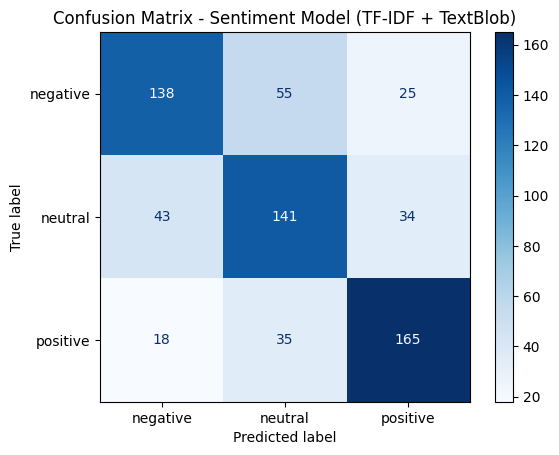

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Use your final trained model pipe and variables y_test, y_pred
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)

# Plotting
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment Model (TF-IDF + TextBlob)")
plt.grid(False)
plt.show()